In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(
    root='./data', 
    train=True, 
    download=True, 
    transform=transform)

trainloader = torch.utils.data.DataLoader(
    trainset, 
    batch_size=4, 
    shuffle=True, 
    num_workers=2)

testset = torchvision.datasets.CIFAR10(
    root='./data', 
    train=False, 
    download=True, 
    transform=transform)

testloader = torch.utils.data.DataLoader(
    testset, 
    batch_size=4, 
    shuffle=False, 
    num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


torch.Size([3, 36, 138])
tensor([ 0.0000,  0.0000,  0.0275,  0.0196,  0.0275,  0.0275,  0.0275,  0.0275,
         0.0275,  0.0353,  0.0353,  0.0353,  0.0510,  0.0588,  0.0588,  0.0745,
         0.0667,  0.0588,  0.0431,  0.0353,  0.0353,  0.0353,  0.0275,  0.0353,
         0.0353,  0.0275,  0.0196,  0.0196,  0.0039, -0.0118, -0.0196, -0.0275,
        -0.0275, -0.0353,  0.0000,  0.0000, -0.7098, -0.6392, -0.4588, -0.4510,
        -0.5686, -0.6627, -0.4196,  0.1529, -0.0588,  0.0980,  0.1765,  0.0196,
        -0.2392, -0.2471, -0.1216, -0.0667,  0.0745,  0.0118, -0.1765, -0.1137,
        -0.1843, -0.4667, -0.2235,  0.2314,  0.0824, -0.2157, -0.3333, -0.4667,
        -0.5294, -0.6549, -0.5608, -0.5686,  0.0000,  0.0000,  0.0510, -0.0196,
         0.0196, -0.0667,  0.0510, -0.1843, -0.0353,  0.3176,  0.2157,  0.1529,
         0.1529,  0.2549,  0.3804,  0.5059,  0.4431,  0.3412,  0.2078,  0.2157,
         0.2000,  0.2784,  0.3647,  0.4275,  0.5373,  0.2392, -0.2078,  0.1373,
         0.3412

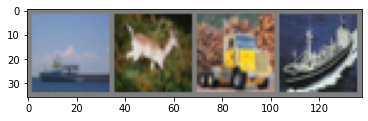

 ship  deer truck  ship


In [3]:
# show some of training images
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    print(img.shape)
    print(img[0][10])
    img = img/2 + 0.5 # unnormalize
    print(img.shape)
    print(img[0][10])
    npimg = img.numpy()
    print(npimg.shape)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [7]:
# define a cnn
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5) 
        self.pool = nn.MaxPool2d(2, 2) 
        self.conv2 = nn.Conv2d(6, 16, 5) 
        self.fc1 = nn.Linear(in_features=16 * 5 * 5, out_features=120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) # conv relu pool
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()

In [9]:
net = net.to(device)

In [10]:
# define a loss function and optimizer
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
# for i in net.parameters():
#     print(i)
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [13]:
# train the network
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # inputs, labels = data
        inputs, labels = data[0].to(device), data[1].to(device)
#         print(inputs.shape) # torch.Size([4, 3, 32, 32]
#         print(labels)
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss:%.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')

[1,  2000] loss:2.224
[1,  4000] loss:1.928
[1,  6000] loss:1.735
[1,  8000] loss:1.583
[1, 10000] loss:1.524
[1, 12000] loss:1.462
[2,  2000] loss:1.382
[2,  4000] loss:1.382
[2,  6000] loss:1.351
[2,  8000] loss:1.311
[2, 10000] loss:1.303
[2, 12000] loss:1.282
Finished Training


In [14]:
# save model
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

torch.Size([3, 36, 138])
tensor([ 0.0000,  0.0000,  0.3333, -0.1922, -0.5765, -0.0275,  0.2000,  0.2627,
         0.2784,  0.3020,  0.2941,  0.3647, -0.1137, -0.0196,  0.2314,  0.2235,
        -0.0510, -0.3255, -0.3569, -0.3412, -0.3725, -0.3647,  0.0824,  0.1451,
        -0.1137, -0.3176, -0.3490, -0.3255, -0.4431, -0.5608, -0.6863, -0.4196,
         0.0431,  0.0745,  0.0000,  0.0000,  0.6941,  0.7333,  0.7647,  0.7647,
         0.7804,  0.8118,  0.8510,  0.8667,  0.8667,  0.8667,  0.8588,  0.8745,
         0.5451,  0.7255,  0.8275,  0.8039,  0.6392,  0.6392,  0.7176,  0.6314,
         0.6392,  0.6471,  0.7020,  0.7098,  0.7647,  0.7882,  0.7882,  0.8039,
         0.8039,  0.8431,  0.8588,  0.8667,  0.0000,  0.0000,  0.3725,  0.3333,
         0.2314,  0.0745,  0.3804,  0.4588,  0.3725,  0.5451,  0.6392,  0.6627,
         0.6157,  0.6471,  0.6627,  0.5765,  0.5137,  0.5137,  0.1137, -0.1765,
        -0.3020, -0.2863, -0.3412, -0.3490, -0.2627, -0.4588, -0.3882, -0.0510,
         0.2706

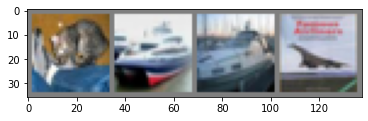

GroundTruth:    cat  ship  ship plane


In [15]:
# test the network
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [16]:
# test 4 image
net = Net()
net.load_state_dict(torch.load(PATH))
outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   car   car plane


In [17]:
# test the whole dataset
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)  #  labels.size(0) == 4， batch_size = 4
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 53 %


In [18]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 61 %
Accuracy of   car : 87 %
Accuracy of  bird : 51 %
Accuracy of   cat : 31 %
Accuracy of  deer : 31 %
Accuracy of   dog : 47 %
Accuracy of  frog : 76 %
Accuracy of horse : 62 %
Accuracy of  ship : 40 %
Accuracy of truck : 48 %


In [45]:
# GPU
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# # Assuming that we are on a CUDA machine, this should print a CUDA device:

# print(device)

# net.to(device)

# inputs, labels = data[0].to(device), data[1].to(device)